## Поиск ассоциативных правил

1. Доработайте программу из задания Поиск частых наборов, чтобы она также выполняла поиск ассоциативных правил. Список результирующих правил должен выдаваться в удобочитаемом виде (антецедент→консеквент) с указанием поддержки и достоверности каждого правила. Дополнительные параметры программы: порог достоверности, способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).
2. Проведите эксперименты на наборах из задания 1. В экспериментах Зафиксируйте значение пороговое значение поддержки (например, 10%), варьируйте пороговое значение достоверности (например, от 70% до 95% с шагом 5%).
3. Выполните визуализацию полученных результатов в виде следующих диаграмм:
    * сравнение быстродействия поиска правил на фиксированном наборе данных при изменяемом пороге достоверности;
    * общее количество найденных правил на фиксированном наборе данных при изменяемом пороге достоверности.
4. Подготовьте список правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов (разумное количество). Проанализируйте и изложите содержательный смысл полученного результата.

In [90]:
import pandas as pd
import chardet
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import time

In [215]:
with open('baskets.csv', 'rb') as f:
    result = chardet.detect(f.read())

result

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

In [216]:
df = pd.read_csv('baskets.csv', header=None, encoding=result['encoding'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
df = df.dropna(how="all", axis=0) # Столбцы
df = df.dropna(how="all", axis=1) # Строки
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(len(transactions))
print(transactions[:3])

7501
[['креветки', 'миндаль', 'авокадо', 'овощная смесь', 'зеленый виноград', 'цельнозерновая мука', 'батат', 'творог', 'энергетический напиток', 'томатный сок', 'низкокалорийный йогурт', 'зеленый чай', 'мед', 'салат', 'минеральная вода', 'лосось', 'ягодный сок', 'замороженный смузи', 'шпинат', 'оливковое масло'], ['гамбургер', 'фрикадельки', 'яйца'], ['чатни']]


In [218]:
# Преобразование списка транзакций в one-hot encoding (Бинарная матрица)
te = TransactionEncoder()
te_trans = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_trans, columns=te.columns_)
df_encoded.head()

,авокадо,аксессуары,баклажаны,батат,батончик без глютена,бекон,белое вино,белый сыр,блинчики,ветчина,...,чили,шампанское,шампунь,шоколад,шпинат,энергетический батончик,энергетический напиток,эскалоп,ягодный сок,яйца
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [239]:
min_support = 0.002
confidence_values = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
frequent_itemsets_df = pd.DataFrame()
rules_df = pd.DataFrame()
execution_times = []
rules_count = []

for confidence in confidence_values:
    print(f"\nДостоверность: {confidence}")

    # Поиск частых наборов
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False).reset_index(drop=True)
    frequent_itemsets["confidence_values"] = confidence

    # Запись частых наборов в DataFrame
    frequent_itemsets_df = pd.concat([frequent_itemsets_df, frequent_itemsets[["support", "itemsets"]]], ignore_index=True)

    start_time = time.perf_counter()
    
    # Поиск ассоциативных правил
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    end_time = time.perf_counter()
    execution_times.append(end_time - start_time)
    
    if not rules.empty:
        rules["confidence_value"] = confidence
        rules = rules[["antecedents", "consequents", "support", "confidence", "confidence_value"]]
        rules = rules.sort_values(by="support", ascending=False).reset_index(drop=True)

        # Запись ассоциативных правил в DataFrame
        rules_df = pd.concat([rules_df, rules], ignore_index=True)
    
    rules_count.append(len(rules))

    print(f"\nЧастые наборы:")
    display(frequent_itemsets[["support", "itemsets"]])
    
    if not rules.empty:
        print(f"Ассоциативные правила:")
        display(rules[["antecedents", "consequents", "support", "confidence", "confidence_value"]])
    else:
        print(f"Нет найденных правил")


Достоверность: 0.7

Частые наборы:


,support,itemsets
0,0.238368,(минеральная вода)
1,0.187975,(макароны)
2,0.179709,(яйца)
3,0.170911,(картофель-фри)
4,0.163845,(шоколад)
...,...,...
2487,0.002133,"(картофель-фри, шоколад, свежий хлеб)"
2488,0.002133,"(картофель-фри, пирожные, яйца)"
2489,0.002133,"(картофель-фри, яйца, оливковое масло)"
2490,0.002133,"(соус для барбекю, говяжий фарш)"


Ассоциативные правила:


,antecedents,consequents,support,confidence,confidence_value
0,"(грибной соус, эскалоп)",(макароны),0.004266,0.744186,0.7
1,"(суп, замороженные овощи, молоко)",(минеральная вода),0.003066,0.766667,0.7
2,"(макароны, растительное масло, яйца)",(минеральная вода),0.003066,0.718750,0.7
3,"(шоколад, оливковое масло, замороженные овощи)",(минеральная вода),0.002800,0.700000,0.7
4,"(яйца, оливковое масло, молоко)",(минеральная вода),0.002666,0.714286,0.7
5,"(макароны, обезжиренное молоко)",(минеральная вода),0.002533,0.730769,0.7
6,"(креветки, говяжий фарш, замороженные овощи)",(макароны),0.002533,0.791667,0.7
7,"(макароны, суп, блинчики)",(минеральная вода),0.002266,0.772727,0.7
8,"(макароны, растительное масло, блинчики)",(минеральная вода),0.002266,0.739130,0.7
9,"(рис, помидоры, молоко)",(макароны),0.002133,0.800000,0.7



Достоверность: 0.75

Частые наборы:


,support,itemsets
0,0.238368,(минеральная вода)
1,0.187975,(макароны)
2,0.179709,(яйца)
3,0.170911,(картофель-фри)
4,0.163845,(шоколад)
...,...,...
2487,0.002133,"(картофель-фри, шоколад, свежий хлеб)"
2488,0.002133,"(картофель-фри, пирожные, яйца)"
2489,0.002133,"(картофель-фри, яйца, оливковое масло)"
2490,0.002133,"(соус для барбекю, говяжий фарш)"


Ассоциативные правила:


,antecedents,consequents,support,confidence,confidence_value
0,"(суп, замороженные овощи, молоко)",(минеральная вода),0.003066,0.766667,0.75
1,"(креветки, говяжий фарш, замороженные овощи)",(макароны),0.002533,0.791667,0.75
2,"(макароны, суп, блинчики)",(минеральная вода),0.002266,0.772727,0.75
3,"(рис, помидоры, молоко)",(макароны),0.002133,0.800000,0.75
4,"(рис, говяжий фарш, блинчики)",(минеральная вода),0.002133,0.842105,0.75
5,"(помидоры, оливковое масло, замороженные овощи)",(макароны),0.002133,0.842105,0.75



Достоверность: 0.8

Частые наборы:


,support,itemsets
0,0.238368,(минеральная вода)
1,0.187975,(макароны)
2,0.179709,(яйца)
3,0.170911,(картофель-фри)
4,0.163845,(шоколад)
...,...,...
2487,0.002133,"(картофель-фри, шоколад, свежий хлеб)"
2488,0.002133,"(картофель-фри, пирожные, яйца)"
2489,0.002133,"(картофель-фри, яйца, оливковое масло)"
2490,0.002133,"(соус для барбекю, говяжий фарш)"


Ассоциативные правила:


,antecedents,consequents,support,confidence,confidence_value
0,"(рис, говяжий фарш, блинчики)",(минеральная вода),0.002133,0.842105,0.8
1,"(помидоры, оливковое масло, замороженные овощи)",(макароны),0.002133,0.842105,0.8



Достоверность: 0.85

Частые наборы:


,support,itemsets
0,0.238368,(минеральная вода)
1,0.187975,(макароны)
2,0.179709,(яйца)
3,0.170911,(картофель-фри)
4,0.163845,(шоколад)
...,...,...
2487,0.002133,"(картофель-фри, шоколад, свежий хлеб)"
2488,0.002133,"(картофель-фри, пирожные, яйца)"
2489,0.002133,"(картофель-фри, яйца, оливковое масло)"
2490,0.002133,"(соус для барбекю, говяжий фарш)"


Нет найденных правил

Достоверность: 0.9

Частые наборы:


,support,itemsets
0,0.238368,(минеральная вода)
1,0.187975,(макароны)
2,0.179709,(яйца)
3,0.170911,(картофель-фри)
4,0.163845,(шоколад)
...,...,...
2487,0.002133,"(картофель-фри, шоколад, свежий хлеб)"
2488,0.002133,"(картофель-фри, пирожные, яйца)"
2489,0.002133,"(картофель-фри, яйца, оливковое масло)"
2490,0.002133,"(соус для барбекю, говяжий фарш)"


Нет найденных правил

Достоверность: 0.95

Частые наборы:


,support,itemsets
0,0.238368,(минеральная вода)
1,0.187975,(макароны)
2,0.179709,(яйца)
3,0.170911,(картофель-фри)
4,0.163845,(шоколад)
...,...,...
2487,0.002133,"(картофель-фри, шоколад, свежий хлеб)"
2488,0.002133,"(картофель-фри, пирожные, яйца)"
2489,0.002133,"(картофель-фри, яйца, оливковое масло)"
2490,0.002133,"(соус для барбекю, говяжий фарш)"


Нет найденных правил


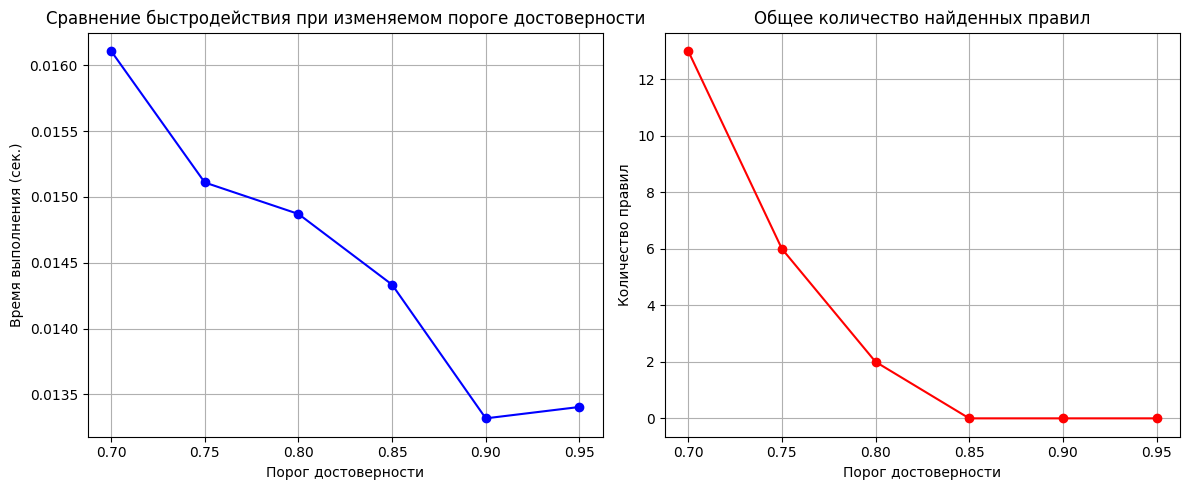

In [240]:
plt.figure(figsize=(12, 5))

# График 1: Время выполнения при изменении порога достоверности
plt.subplot(1, 2, 1)
plt.plot(confidence_values, execution_times, marker="o", linestyle="-", color="b")
plt.title("Сравнение быстродействия при изменяемом пороге достоверности")
plt.xlabel("Порог достоверности")
plt.ylabel("Время выполнения (сек.)")
plt.grid(True)

# График 2: Количество найденных правил при изменении порога достоверности
plt.subplot(1, 2, 2)
plt.plot(confidence_values, rules_count, marker="o", linestyle="-", color="r")
plt.title("Общее количество найденных правил")
plt.xlabel("Порог достоверности")
plt.ylabel("Количество правил")
plt.grid(True)

# Установка макета
plt.tight_layout()
plt.show()

На первом графике можно заметить, что при увеличении порога достоверности время выполнения уменьшается, так как при увеличении порога, количество найденных правил уменьшается, а значит необходимо обрабатывать меньшее количество правил, поэтому время работы алгоритма и сложность вычислений уменьшаются. Чем меньше правил подлежит обработке, тем ниже вычислительная сложность.

На втором графике можно заметить, что при увеличении порога достоверности количество найденных правил уменьшается, так как всё меньшее количество правил подходит под требования к достоверности, поэтому правила, не подходящие под заданный порог, исключаются.

In [245]:
filtered_rules = rules_df[rules_df.apply(lambda x: len(x["antecedents"]) + len(x["consequents"]) <= 7, axis=1)]

filtered_rules = filtered_rules[["antecedents", "consequents", "support", "confidence"]]

filtered_rules = filtered_rules.sort_values(by=["support"], ascending=False)

print("\nСписок правил с антецедентом и консеквентом, где не более 7 объектов:")
display(filtered_rules)


Список правил с антецедентом и консеквентом, где не более 7 объектов:


,antecedents,consequents,support,confidence
0,"(грибной соус, эскалоп)",(макароны),0.004266,0.744186
2,"(макароны, растительное масло, яйца)",(минеральная вода),0.003066,0.718750
1,"(суп, замороженные овощи, молоко)",(минеральная вода),0.003066,0.766667
13,"(суп, замороженные овощи, молоко)",(минеральная вода),0.003066,0.766667
3,"(шоколад, оливковое масло, замороженные овощи)",(минеральная вода),0.002800,0.700000
4,"(яйца, оливковое масло, молоко)",(минеральная вода),0.002666,0.714286
5,"(макароны, обезжиренное молоко)",(минеральная вода),0.002533,0.730769
6,"(креветки, говяжий фарш, замороженные овощи)",(макароны),0.002533,0.791667
14,"(креветки, говяжий фарш, замороженные овощи)",(макароны),0.002533,0.791667
7,"(макароны, суп, блинчики)",(минеральная вода),0.002266,0.772727


В списке правил можно наблюдать самые частые зависимости между продуктами. Самыми популярными консеквентами являются макароны и минеральная вода. Это означает, что они очень часто встречаются в наборах с другими различными продуктами. Самая большая достоверность равняется 84%, это означает, что, например, вероятность того, что покупатель возьмет минеральную воду вдобавок к рису, говяжьему фаршу и блинчикам равна 84%. Самым популярным набором является грибной соус и эскалоп, к которым вдобавок берут макароны (наивысший уровень поддержки). 

Сильная взаимосвязь при покупке различных продуктов дает сделать вывод о том, что можно продавать эти продукты рядом друг с другом, что увеличит вероятность того, что эти товары будут куплены, а значит увеличится прибыль.